In [5]:
import xarray as xr
import sys
import glob, os
import re

In [18]:
#inDirName = '/Users/smurugan9/research/aislens/aislens_emulation/data/processed/E3SM_lowres_newrun_FluxSSH/'
processedDir = '/Users/smurugan9/research/aislens/aislens_emulation/data/processed/'

In [4]:
# Define project repo path
inDirName = '/Users/smurugan9/research/aislens/aislens_emulation/'

# DATA FILE PATHS

# Data containing regridded flux and SSH for 150 years
regriddedFluxSSH_filepath = 'data/interim/RegriddedFluxSSH.nc'

# File contains all defined ice shelves
iceShelvesShape_filepath = 'data/interim/iceShelves.geojson'

# Folder for output figures
figures_folderpath = 'reports/figures/' 

interim_data_folder = 'data/interim/'
flux_dedrafted_data_path = 'dedrafted_flux_IMBIE/'
randomized_realizations_path = 'randomized_realizations/'
flux_dedrafted_iceshelves_data_path = 'iceshelves_dedrafted_flux/'
reconstructions_neofs_path = 'reconstructions_neofs/'
cise_file_path = 'cise_data/'

In [ ]:
## PACE DIRECTORIES 

# Directory containing E3SM_lowres_newrun .nc files
# Files available on sermia. Copy these data files into this directory
#inDirName = '/storage/home/hcoda1/6/smurugan9/scratch/E3SM_lowres_newrun/'
#inDirName = '/Users/smurugan9/research/aislens/aislens_emulation/data/raw/'

# Directory to save output files. 
# These files will contain the landIceFreshwaterFlux and SSH data variables from the original dataset without any regridding, i.e., it will remain an unstructured mesh output.
#outDirName = '/storage/home/hcoda1/6/smurugan9/data/E3SM_lowres_newrun_fluxSSH/'
#outDirName = '/Users/smurugan9/research/aislens/aislens_emulation/data/processed/E3SM_lowres_newrun_FluxSSH/'

In [ ]:
datasets = []
for example in examples:
    ds = create_an_xarray_dataset(example)
    datasets.append(ds)
combined = xarray.concat(datasets, dim='example')

In [11]:
datasets = []

for file in sorted(glob.glob(inDirName+"mpaso.FluxSSH.*.nc")):
    (path, inFileName) = os.path.split(file)
    print(inFileName)
    #d.append(inFileName)
    ds = xr.open_dataset(inDirName+inFileName)
    datasets.append(ds)
combined_ds = xr.concat(datasets,dim='Time')
combined_ds.to_netcdf('mpaso.FluxSSH.newrun.nc')
print("time coord assigned.")

mpaso.FluxSSH.0001-01-01.nc
mpaso.FluxSSH.0001-02-01.nc
time coord assigned.


In [23]:
regridded_data = xr.open_dataset(inDirName+regriddedFluxSSH_filepath)
regriddedflux = regridded_data.timeMonthly_avg_landIceFreshwaterFlux
regriddedssh = regridded_data.timeMonthly_avg_ssh

In [25]:
regriddedflux_ts = regriddedflux.sum(['y','x'])

In [8]:
ds = xr.open_dataset(processedDir+'mpaso.FluxSSH.newrun.nc')

In [10]:
flux = ds.timeMonthly_avg_landIceFreshwaterFlux
ssh = ds.timeMonthly_avg_ssh

In [19]:
flux.to_netcdf(processedDir+'mpaso.flux.newrun.nc')

In [21]:
flux.plot()

In [29]:
flux_ts = flux.sum('nCells')

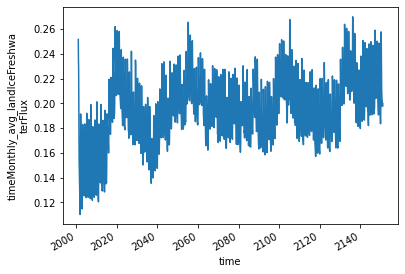

In [33]:
regriddedflux_ts.plot()

In [7]:
from sklearn.decomposition import SparsePCA

In [8]:
tr = SparsePCA()

In [11]:
flux_partial = flux[0:500,:]

In [ ]:
spca_flux = tr.fit(flux_partial)

In [3]:
from mpas_analysis import ocean

In [14]:
ocean.time_series_antarctic_melt.TimeSeriesAntarcticMelt

mpas_analysis.ocean.time_series_antarctic_melt.TimeSeriesAntarcticMelt